# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [615]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Libraries for data preparation and model building
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import pearsonr
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBRegressor

# Setting global constants to ensure notebook results are reproducible
NR_CV = 5   # no of cross validations used in GridSearchCV

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| This section contains loading the datasets from the `df_train` and `df_test` file into a DataFrame. |

---

In [562]:
df_train = pd.read_csv('df_train.csv') # load the train data
df_test = pd.read_csv('df_test.csv')   # load the test data

In [563]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Data Statistics

In [564]:
df_train.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [565]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [566]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

#### 3.1.1 Summary of observations from data statistics

- The Train data contains 8763 entries with 49 features. 
- Of these 49 features, 46 of them contains numerical variable (45 float64 and 1 int64) while the remaining three are categorical. 
- All the features contain 8763 non-null values, meaning they do not contain null values except for Valencia_pressure which has 6695 non-null values.

### 3.2 Null Values

In [567]:
# get features with null values

missing_val_count_by_column = (df_train.isnull().sum())
features_with_missing = missing_val_count_by_column[missing_val_count_by_column > 0]
features_with_missing

Valencia_pressure    2068
dtype: int64

In [568]:
# get percentage of null values

percentage_missing = round((features_with_missing / df_train.shape[0]) * 100, 2)
percentage_missing

Valencia_pressure    23.6
dtype: float64

Valencia_pressure is the only variable with null entries. Its null values account for 23.6% of the entire dataset. There are several options to handle missing values which includes (i) Dropping the feature (ii) Droping entries with null (iii) filling the feature with representative value.

#### 3.2.2 Summary Observation of Null Values

- Only valencial_pressure contain null value
- Null values in valencial pressure accounts for 23.6% of the feature entries
- Valencial_pressure has very minute correlation to the target variable. Alone, it has no relationship with the target variable
- <p style="color:red"> We handle the missing values by imputation of the median</p>

### 3.3 Categorical Data

In [569]:
# get a snapshop of the categorical dataframe

df_categorical_features = [x for x in df_train.columns if df_train[x].dtype == 'object']
df_train[df_categorical_features].describe()

,time,Valencia_wind_deg,Seville_pressure
count,8763,8763,8763
unique,8763,10,25
top,2015-01-01 03:00:00,level_1,sp13
freq,1,1072,500


From the description of the categorical features, it is obvious that valencial_wind_deg and Seville_pressure contains **Ordinal** values because they contain intrisinct order as indicated by the numbers attached to each value. While the time feature contains datetime value.

In [570]:
df_train[df_categorical_features].head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25


#### 3.3.2 Summary Observation of Categorical Data

- Time feature contains year, month, day, hour, minute and seconds
- Seville_pressure and valencia_wind_deg contain ordinal data
- Since most models does not support categorical variables, it is important to encode the categorical data to numerical by
    - <p style="color:red"> Replacing the values in the Sevile_pressure column with the numbers attached to them. i.e sp5 is replaced with 5 etc. </p>
    - <p style="color:red"> Replacing the values in the Valencia_wind_deg column with the numbers attached to them. i.e level_5 is replaced with 5 etc. </p>
    - <p style="color:red"> Splitting the time feature into multiple features containing year, month, day, hour, minute, seconds </p>
    - <p style="color:red"> Drop the minute and seconds features as they contain 0's </p>

### 3.4 Numerical Data

In [571]:
# get a snapshop of the Numerical data

df_numerical_features = [x for x in df_train.columns if df_train[x].dtype in ['int64', 'float64']]
df_train[df_numerical_features].describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


#### 3.4.1 Distribution of Numerical features

In [528]:
# Histogram plotting of the numerical data
df_train[df_numerical_features].hist(figsize=(25,25))
plt.show()

KeyError: "['Unnamed: 0', 'Seville_humidity', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Valencia_pressure', 'Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp', 'Seville_temp', 'Barcelona_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp_min'] not in index"

The distribution of the dataset shows that Bilbao_rain_1h', Valencia_wind_speed', 'Bilbao_wind_speed',Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id' and 'Seville_weather_id' has outliers (They are akwardly skewed) meaning that they have outliers.

#### 3.4.2 Outliers

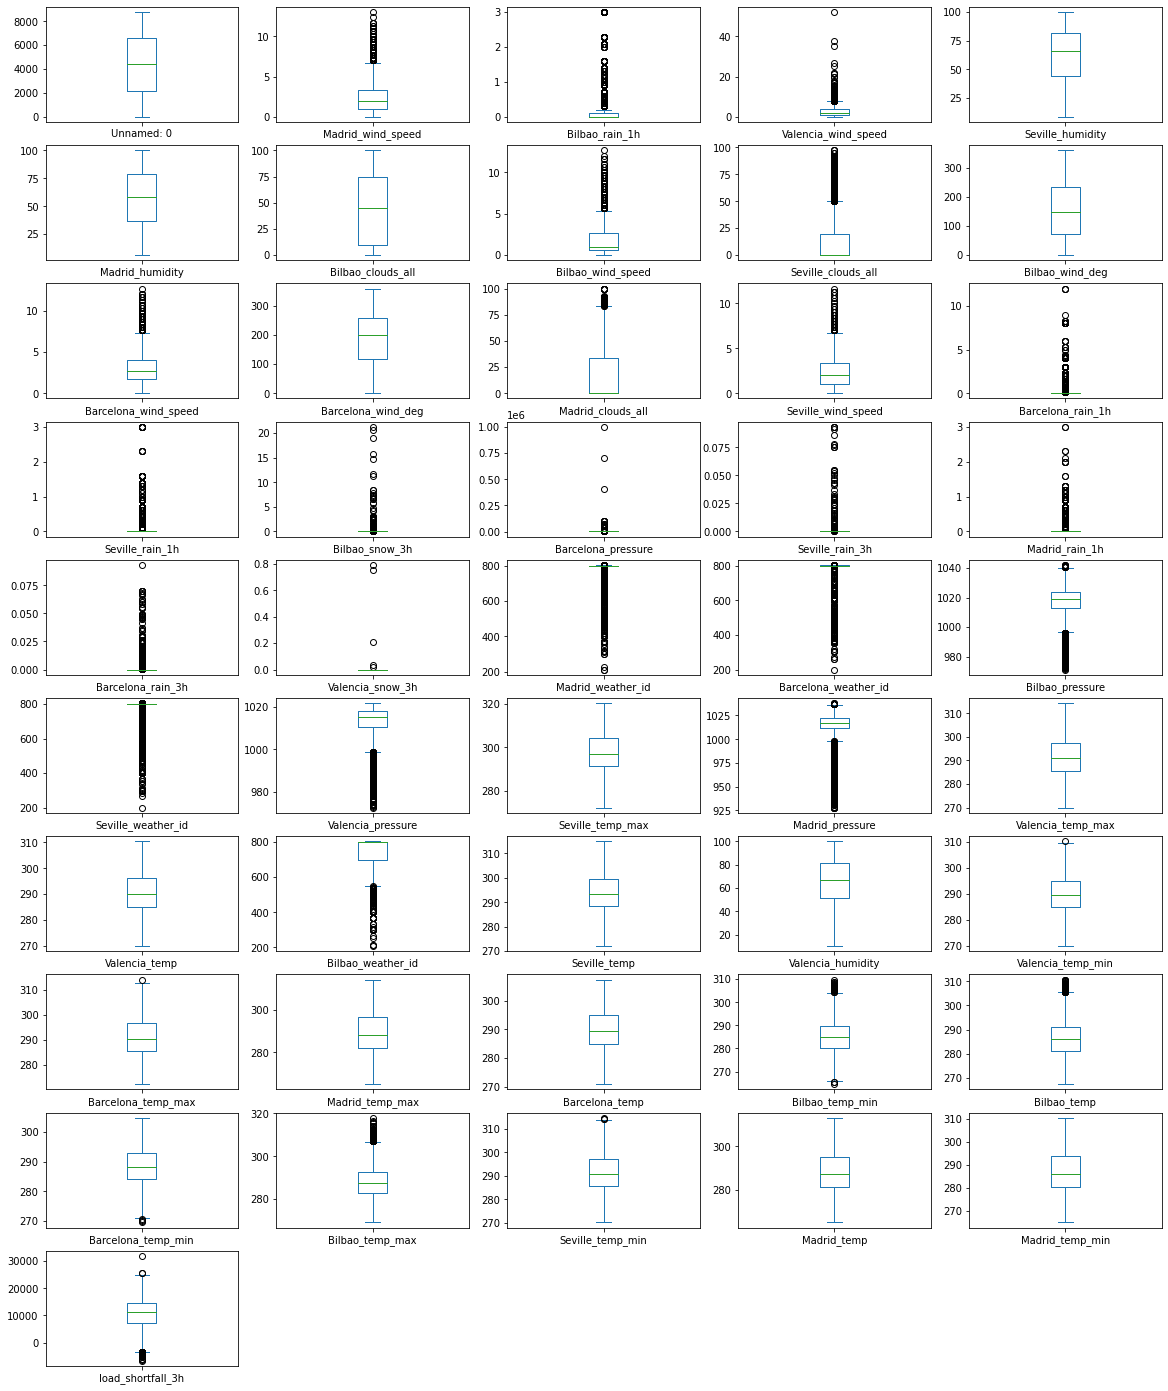

In [257]:
# box plots for numeric data to verify outliers
df_train[df_numerical_features].plot(kind='box', subplots=True, layout=(10, 5), sharex=False, figsize=(20, 25));

In [258]:
# Calculating the kurtosis of the numerical dataset

kurt = df_train[df_numerical_features].kurtosis()
kurt = zip(kurt.index, kurt.values)
features_with_outliers = [(x,y) for (x,y) in kurt if y > 3]
features_with_outliers

[('Bilbao_rain_1h', 32.90465647123472),
 ('Valencia_wind_speed', 35.645426386267474),
 ('Bilbao_wind_speed', 3.6315653270441643),
 ('Barcelona_rain_1h', 101.5789308218838),
 ('Seville_rain_1h', 93.84074607373714),
 ('Bilbao_snow_3h', 806.1284706376119),
 ('Barcelona_pressure', 3687.5642300069417),
 ('Seville_rain_3h', 413.1365923500452),
 ('Madrid_rain_1h', 76.5844913665545),
 ('Barcelona_rain_3h', 187.8004595033525),
 ('Valencia_snow_3h', 4089.323165482344),
 ('Madrid_weather_id', 9.25904651532839),
 ('Barcelona_weather_id', 5.701881572742422),
 ('Seville_weather_id', 10.710308129580135)]

The box plots of the numeric data and the extraction of columns with outliers using kurtosis confirms the presence of outliers in those previously marked features.

#### 3.4.2.1 Verifying the extend of Outliers in features with outliers

In [259]:
# Checking the skewness of each feature

columns_with_outlier = [x[0] for x in features_with_outliers]
skewness = df_train[columns_with_outlier].skew()
skewness

Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Bilbao_wind_speed        1.716914
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Seville_weather_id      -3.275574
dtype: float64

The skewness of the features with outliers are either less than -1 or are greater than 1. It indicates that all those features are either higly negatively skewed or highly positively skewed. For skewed features, we can measure the boundaries for each column using the formulars below:
   - Lower Boundary = First Quartile(Q1/25th percentile) — (3 * IQR)
   - Upper Boundary = Third Quartile(Q3/75th percentile) + (3 * IQR)

In [572]:
# Calculating the numbers of values above the 90th percentile for each field

quantile = df_train[columns_with_outlier].quantile(0.75)
outliers = []

for column in columns_with_outlier:
    focus_df = df_train[df_train[column] > quantile[column]]
    dict = {
        'column': column,
        'no_of_ouliers': focus_df.shape[0],
        'min': df_train[column].min(),
        'max': df_train[column].max(),
        '90th_percentile': quantile[column]
    }
    outliers.append(dict)

outliers

[{'column': 'Bilbao_rain_1h',
  'no_of_ouliers': 1985,
  'min': 0.0,
  'max': 3.0,
  '90th_percentile': 0.1},
 {'column': 'Valencia_wind_speed',
  'no_of_ouliers': 1993,
  'min': 0.0,
  'max': 52.0,
  '90th_percentile': 3.6666666667},
 {'column': 'Bilbao_wind_speed',
  'no_of_ouliers': 1994,
  'min': 0.0,
  'max': 12.6666666667,
  '90th_percentile': 2.6666666667},
 {'column': 'Barcelona_rain_1h',
  'no_of_ouliers': 1297,
  'min': 0.0,
  'max': 12.0,
  '90th_percentile': 0.0},
 {'column': 'Seville_rain_1h',
  'no_of_ouliers': 854,
  'min': 0.0,
  'max': 3.0,
  '90th_percentile': 0.0},
 {'column': 'Bilbao_snow_3h',
  'no_of_ouliers': 97,
  'min': 0.0,
  'max': 21.3,
  '90th_percentile': 0.0},
 {'column': 'Barcelona_pressure',
  'no_of_ouliers': 2053,
  'min': 670.6666666667,
  'max': 1001411.0,
  '90th_percentile': 1022.0},
 {'column': 'Seville_rain_3h',
  'no_of_ouliers': 90,
  'min': 0.0,
  'max': 0.0933333333,
  '90th_percentile': 0.0},
 {'column': 'Madrid_rain_1h',
  'no_of_ouliers':

Many of the features have very large descripancies between the 90th percentile and the maximum values. Hence, we can inpute representative values for entries in such features above the 90th percentile. For features such as Bilbao_snow_3h, Seville_rain_1h, Seville_rain_3h, Barcelona_rain_3h, Valencia_snow_3h because the 90th percentile are 0. indicating lack of variability in the feature entries.

#### 3.4.3 Correlation between Numerical variables

In [261]:
# check correlation of the dataset
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


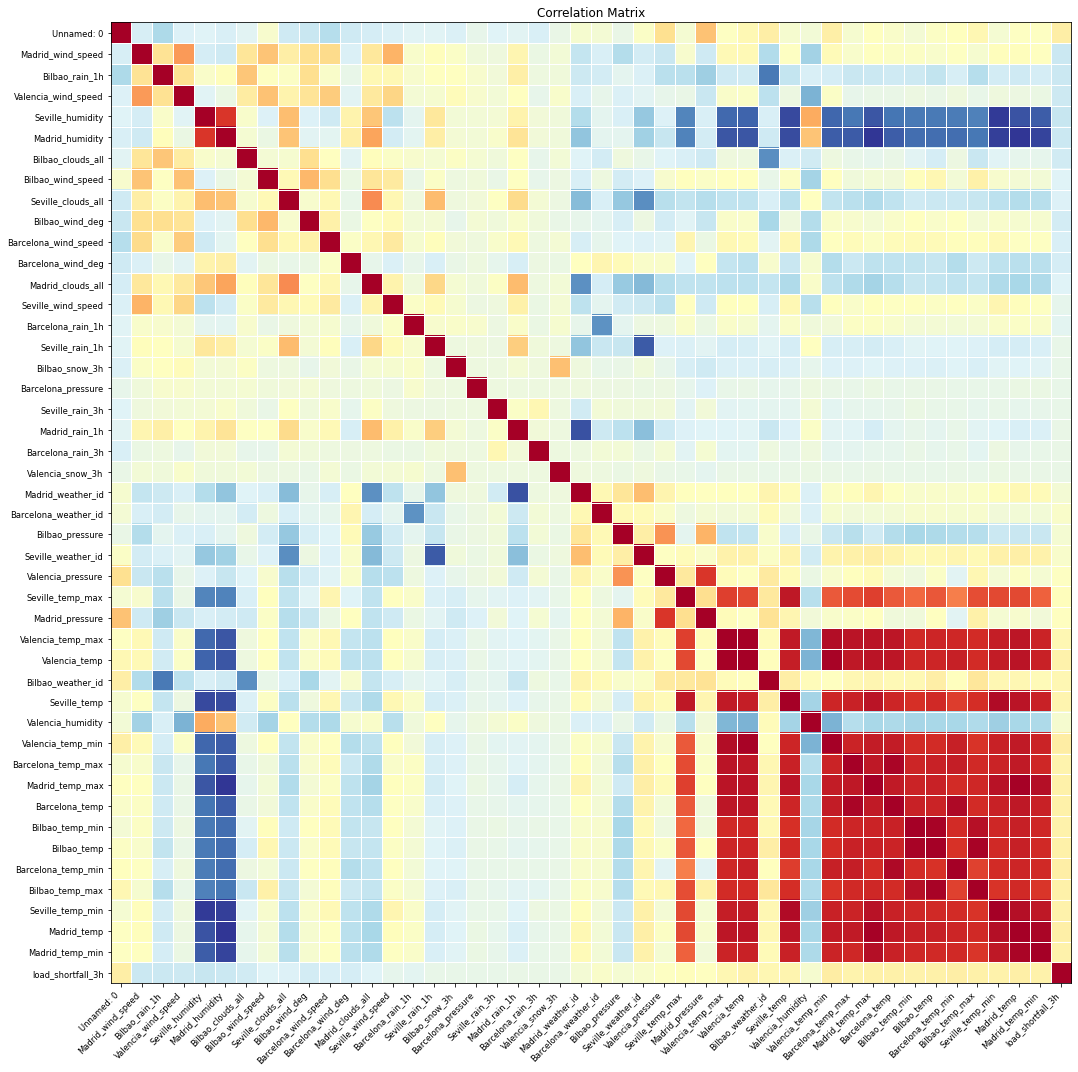

In [262]:
# correlation heatmap
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

From the cluster of red and blue shades in the heatmap, it can be deduced that there are multicolinearity in the data.

Seville_humidity and Madrid_humidity is highly correlated, this may indicate that Seville and Madrid exprience same weather codition

All location temperature  associated vairable are all highly correlated too, which may seems that temperature variables are similar in spain and may also be redundanct to our model; we may need to drop most of the temperature columns

Humidity and Temperature variables also seem correlated

We need to drop varaible across humidity and temperature and leave associate variables of highest significance respectively

In [263]:
# Calculate correlations between predictor variables and the response variable
corrs = df_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs = corrs[1:]
corrs

Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Unnamed: 0              0.192612
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_

#### 3.4.1 Relationship between Predictors and Target Variables

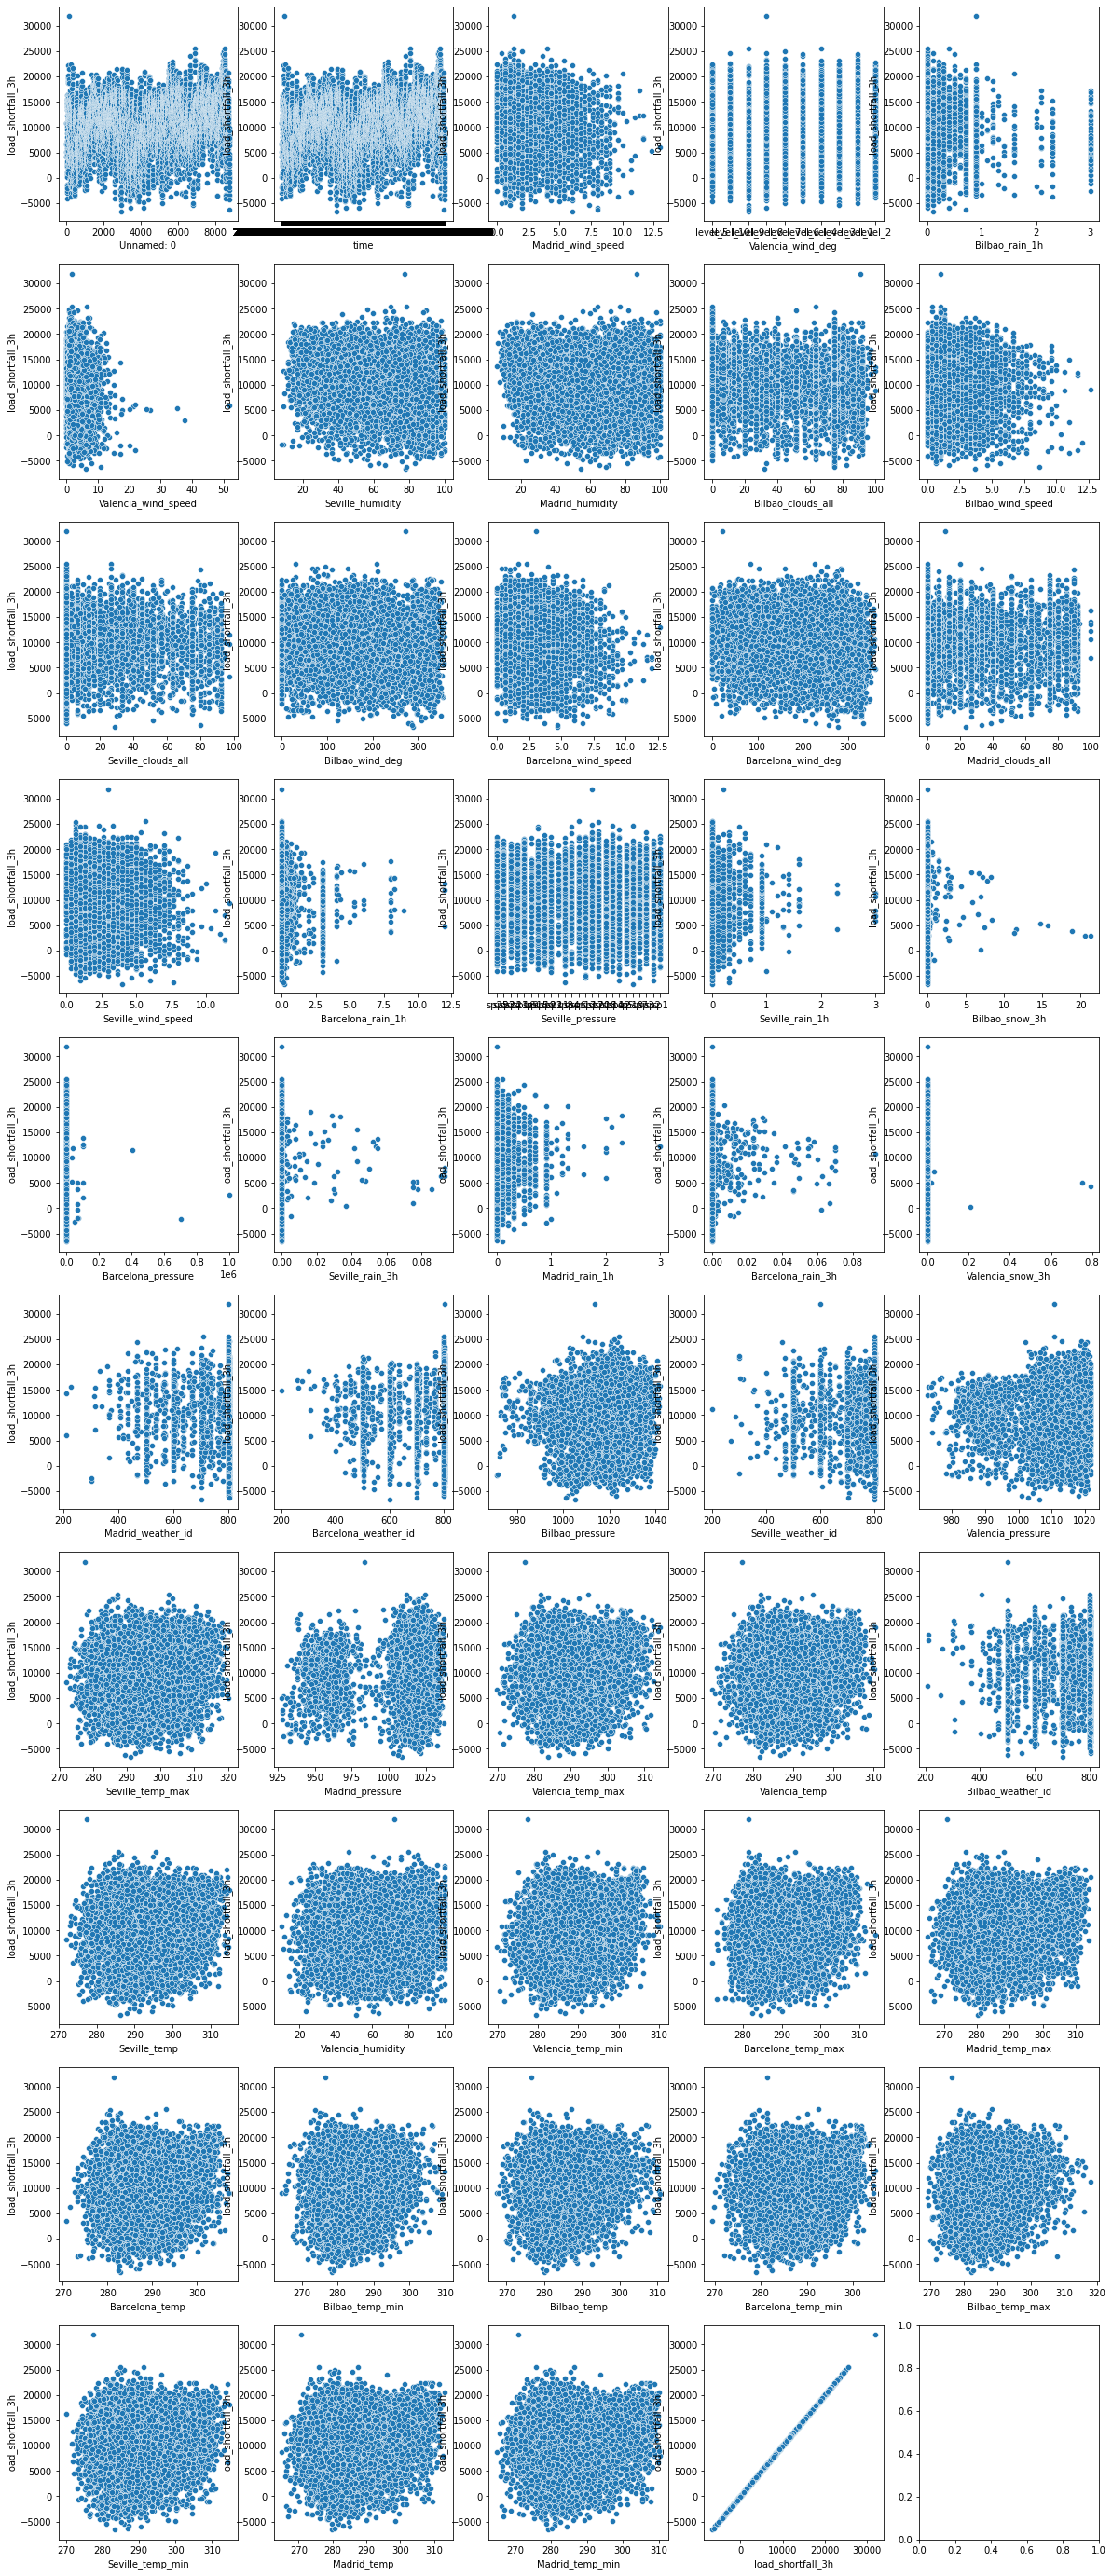

In [264]:
# checking for linearity
fig, ax = plt.subplots(10, 5, figsize=(20,50))
ax = ax.ravel()
for x, column in enumerate(df_train.columns):
    sns.scatterplot(x=df_train[column], y=df_train['load_shortfall_3h'], ax=ax[x])

The scatter plots does not reveal linear relationships between the features and the target variables. 

#### Summary Observation of Numeric data

- <p style="color: red">Unnamed: 0 should be dropped --> It is an auto-iincrementing feature which has no effect on the target variable </p>
- <p style="color: red"> Bilbao_snow_3h, Seville_rain_1h, Seville_rain_3h, Barcelona_rain_3h, Valencia_snow_3h --> Lack of variability in the data </p>
- <p style="color: red"> Other columns containing outliers should have the outliers replaced with the feature representative value </p>
- <p style="color: red"> One of sevile_humidity or madrid_humidity should be dropped, and only one each of the distinct temp variants should be kept, the remainder should be droped --> High mullticolinearity
</p>

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, the dataset is cleaned, features some features engineered and some dropped - as identified in the EDA phase. |

---

#### 4.1 Handling Missing Values

As identified in the EDA, we drop Valencia_pressure due to lack of correlation with the target variable and the large pressence of nulls about 24%

In [573]:
df_train.drop(['Valencia_pressure'], axis='columns', inplace=True)
df_test.drop(['Valencia_pressure'], axis='columns', inplace=True)

#### 4.2 Handling Categorical Variables

- Replacing the values in the Sevile_pressure column with the numbers attached to them. i.e sp5 is replaced with 5 etc.

- Replacing the values in the Valencia_wind_deg column with the numbers attached to them. i.e level_5 is replaced with 5 etc.

- Splitting the time feature into multiple features containing year, month, day, hour, minute, seconds

- Drop the minute and seconds features as they contain 0's

In [574]:
# Replace the values in the Sevile_pressure column with the numbers attached to them.

df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)').astype('int64')
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [575]:
# Replacing the values in the Valencia_wind_deg column with the numbers attached to them. 
# i.e level_5 is replaced with 5 etc.

df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')

Splitting the time feature into year, month, day, hour, minutes, seconds

In [576]:
# splitting the time column into date and time
df_train[['date', 'time_col']] = df_train['time'].str.split(' ', expand=True)
df_test[['date', 'time_col']] = df_test['time'].str.split(' ', expand=True)

In [577]:
# split the date into year, month and day
df_train[['year', 'month', 'day']] = df_train['date'].str.split('-', expand=True)
df_test[['year', 'month', 'day']] = df_test['date'].str.split('-', expand=True)

In [578]:
# Extracting hour from the time_col
df_train[['hour', 'others']] = df_train['time_col'].str.split(':', expand=True, n=1)
df_test[['hour', 'others']] = df_test['time_col'].str.split(':', expand=True, n=1)

In [579]:
# Reserving the test time for predict submission

test_time = df_test['time']

In [580]:
# Dropping others, time, time_col and date
columns_to_drop = ['others', 'time', 'time_col', 'date']
df_train.drop(columns_to_drop, axis='columns', inplace=True)
df_test.drop(columns_to_drop, axis='columns', inplace=True)

In [581]:
# Convert the new features to numeric
cols = ['year', 'month', 'day', 'hour']
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_test[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce', axis=1)

#### 4.3 Feature Selection

In [582]:
# drop Unnamed: 0 feature

df_train.drop("Unnamed: 0", axis='columns', inplace=True)
df_test.drop("Unnamed: 0", axis='columns', inplace=True)

In [583]:
# dropping features for lack of variability
features_to_drop = ['Seville_rain_1h', 'Bilbao_snow_3h', 
                    'Seville_rain_3h', 'Barcelona_rain_3h', 
                    'Valencia_snow_3h', 'Madrid_rain_1h', 'Barcelona_rain_1h']
df_train.drop(features_to_drop, axis='columns', inplace=True)
df_test.drop(features_to_drop, axis='columns', inplace=True)

In [584]:
# dropping Seville_humidity --> multicolinear with Madrid humidity
df_train.drop('Seville_humidity', axis='columns', inplace=True)
df_test.drop('Seville_humidity', axis='columns', inplace=True)

Dropping multicolinear variant of temperatures

In [585]:
# find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = df_train.corr()
row, column = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(row != column)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
high_corr = corr.iloc[row[off_diagonal], column[off_diagonal]]

In [586]:
# Selecting the different variants of temperature
temp_dict = {}
for x in high_corr.columns:
    finder = x.find('_')
    y = x[finder+1:]
    temp_dict[y] = temp_dict[y] + 1 if y in temp_dict else 1
temp_dict

{'temp': 25, 'temp_min': 12, 'temp_max': 21}

In [587]:
# extracting columns with better correlation using the distinct weather parameters and the correlation dataframe 
temp_variant = [x for x in corrs.index if x[x.find('_')+1:] in temp_dict]
corrs.loc[temp_variant].sort_values(ascending=False)

Valencia_temp_min     0.201863
Barcelona_temp_min    0.195984
Madrid_temp           0.186036
Barcelona_temp        0.182673
Madrid_temp_max       0.182548
Bilbao_temp_max       0.180934
Bilbao_temp           0.176411
Madrid_temp_min       0.174744
Seville_temp_min      0.174718
Valencia_temp         0.173225
Bilbao_temp_min       0.172920
Barcelona_temp_max    0.164734
Seville_temp          0.159343
Valencia_temp_max     0.144270
Seville_temp_max      0.109834
Name: load_shortfall_3h, dtype: float64

Therefore, we keep the Valencia_temp_min, Madrid_temp, and Madrid_temp_max and drop the other variants

In [588]:
# Dropping the other temperature variants

usable_high_corr = ['Valencia_temp_min', 'Madrid_temp', 'Madrid_temp_max']
drop_coln_list = [x for x in high_corr.columns.unique() if x not in usable_high_corr]

df_train.drop(drop_coln_list, axis=1, inplace=True)
df_test.drop(drop_coln_list, axis=1, inplace=True)

['Seville_temp', 'Valencia_temp', 'Barcelona_temp_max', 'Barcelona_temp', 'Valencia_temp_max', 'Seville_temp_max', 'Seville_temp_min', 'Madrid_temp_min', 'Barcelona_temp_min', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min']


In [589]:
df_train.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Madrid_temp_max,Madrid_temp,load_shortfall_3h,year,month,day,hour
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.135753,2.586272,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,724.722362,65.247727,289.867648,289.540309,288.419439,10673.857612,2016.000571,6.524820,15.740157,10.498459
std,1.850371,2.877642,0.374901,2.411190,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,115.846537,19.262322,6.907402,9.752047,9.346796,5218.046404,0.816054,3.447976,8.798664,6.874031
min,0.000000,1.000000,0.000000,0.000000,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,207.333333,10.333333,269.888000,264.983333,264.983333,-6618.000000,2015.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,700.333333,51.333333,284.783333,282.150000,281.404281,7390.333333,2015.000000,4.000000,8.000000,4.500000
50%,2.000000,5.000000,0.000000,1.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,800.000000,67.000000,289.550000,288.116177,287.053333,11114.666667,2016.000000,7.000000,16.000000,9.000000
75%,3.333333,8.000000,0.100000,3.666667,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,801.666667,81.333333,294.820000,296.816667,295.154667,14498.166667,2017.000000,10.000000,23.000000,15.000000
max,13.000000,10.000000,3.000000,52.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,804.000000,100.000000,310.272000,314.483333,313.133333,31904.000000,2017.000000,12.000000,31.000000,21.000000


#### 4.4 Handling Outlier

In [590]:
# Replacing all outlier values with the median value
def replace_outliers(row, column, quantile, mean):
    if row[column] > quantile:
        row[column] = mean
    return row
    
features_with_outlier = ['Bilbao_rain_1h', 'Valencia_wind_speed',
                         'Bilbao_wind_speed', 'Barcelona_pressure',
                         'Madrid_weather_id', 'Barcelona_weather_id',
                         'Seville_weather_id']

for feature in features_with_outlier:
    df_target = df_train.loc[df_train[feature] < quantile[feature], feature]
    mean = df_target.mean()
    df_train = df_train.apply(replace_outliers, column = feature, quantile=quantile[feature], mean=mean, axis=1)

In [591]:
df_train.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Madrid_temp_max,Madrid_temp,load_shortfall_3h,year,month,day,hour
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.006950,1.558233,57.414717,43.469132,1.071380,13.714748,158.957511,2.870497,...,724.722362,65.247727,289.867648,289.540309,288.419439,10673.857612,2016.000571,6.524820,15.740157,10.498459
std,1.850371,2.877642,0.025431,0.825568,24.335396,32.551044,0.611218,24.272482,102.056299,1.792197,...,115.846537,19.262322,6.907402,9.752047,9.346796,5218.046404,0.816054,3.447976,8.798664,6.874031
min,0.000000,1.000000,0.000000,0.000000,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,207.333333,10.333333,269.888000,264.983333,264.983333,-6618.000000,2015.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,700.333333,51.333333,284.783333,282.150000,281.404281,7390.333333,2015.000000,4.000000,8.000000,4.500000
50%,2.000000,5.000000,0.000000,1.487355,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,800.000000,67.000000,289.550000,288.116177,287.053333,11114.666667,2016.000000,7.000000,16.000000,9.000000
75%,3.333333,8.000000,0.000000,2.000000,78.666667,75.000000,1.333333,20.000000,234.000000,4.000000,...,801.666667,81.333333,294.820000,296.816667,295.154667,14498.166667,2017.000000,10.000000,23.000000,15.000000
max,13.000000,10.000000,0.100000,3.666667,100.000000,100.000000,2.666667,97.333333,359.333333,12.666667,...,804.000000,100.000000,310.272000,314.483333,313.133333,31904.000000,2017.000000,12.000000,31.000000,21.000000


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### 5.1 split data

In [592]:
# Divide data into training and validation subsets
df_train_tar = df_train['load_shortfall_3h']
df_train_pred = df_train.drop('load_shortfall_3h', axis='columns')

df_x_train, df_x_valid, df_y_train, df_y_valid = train_test_split(df_train_pred, df_train_tar, train_size=0.8, test_size=0.2, random_state=0)

In [598]:
# Creating a function that check metrics
def metrics_fn(y, predict):
    mae = round(metrics.mean_absolute_error(y, predict), 2)
    mse = round(metrics.mean_squared_error(y, predict), 2)
    r2 = round(metrics.r2_score(y, predict), 4)
    return mae, mse, r2

#### 5.3 Linear Regression Model

In [603]:
# Function for creating Linear Regression
def score_dataset_lr(df_X_train, df_X_valid, df_y_train, df_y_valid):
    model = LinearRegression()
    model.fit(df_x_train, df_y_train)
    pred_train = model.predict(df_x_train)
    pred_valid = model.predict(df_x_valid)
    train_met = metrics_fn(df_y_train, pred_train)
    valid_met = metrics_fn(df_y_valid, pred_valid)
    return train_met, valid_met

In [604]:
print("METRICS for Linear Regression")
linear_model = score_dataset_lr(df_x_train, df_x_valid, df_y_train, df_y_valid)
linear_result = pd.DataFrame(linear_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
linear_result

METRICS for Linear Regression


,MAE,MSE,R2
Training,3801.68,22966166.43,0.1533
Validation,3871.58,23642896.13,0.1434


#### 5.4 Random Forest

In [605]:
# Function for creating RandomForestRegressor
def score_dataset_rfg(df_X_train, df_X_valid, df_y_train, df_y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(df_x_train, df_y_train.values.ravel())
    pred_train = model.predict(df_x_train)
    pred_valid = model.predict(df_x_valid)
    train_met = metrics_fn(df_y_train, pred_train)
    valid_met = metrics_fn(df_y_valid, pred_valid)
    return train_met, valid_met

In [606]:
print("METRICS for Random Forest Regressor")
rfg_model = score_dataset_rfg(df_x_train, df_x_valid, df_y_train, df_y_valid)
rfg_result = pd.DataFrame(rfg_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
rfg_result

METRICS for Random Forest Regressor


,MAE,MSE,R2
Training,902.84,1370341.85,0.9495
Validation,2428.26,9346026.14,0.6614


#### 5.5 KNN Regressor

In [607]:
knn_regressor = KNeighborsRegressor(n_neighbors = 15, weights='distance', algorithm= 'kd_tree')
knn_regressor.fit(df_x_train, df_y_train)
predict = knn_regressor.predict(df_x_valid)
knn_MAE = mean_absolute_error(df_y_valid, predict)
knn_MAE

4028.062950279726

#### 5.6 Lasso Regressor

In [609]:
lasso_regressor = Lasso(alpha = 0.01, normalize = False)
#parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False]
lasso_regressor.fit(df_x_train, df_y_train)
predict = lasso_regressor.predict(df_x_valid)
lasso_MAE = mean_absolute_error(df_y_valid, predict)
lasso_MAE

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


3871.5788624789407

#### 5. 7 Decision Tree Regressor

In [610]:
# Function for creating DecisionTreeRegressor
def score_dataset_dtr(df_x_train, df_x_valid, df_y_train, df_y_valid):
    model = DecisionTreeRegressor(max_depth=9, random_state=0, max_leaf_nodes=500)
    model.fit(df_x_train, df_y_train.values.ravel())
    pred_train = model.predict(df_x_train)
    pred_valid = model.predict(df_x_valid)
    train_met = metrics_fn(df_y_train, pred_train)
    valid_met = metrics_fn(df_y_valid, pred_valid)
    return train_met, valid_met

In [611]:
print("METRICS for Decision Tree Regressor")
dtr_model = score_dataset_dtr(df_x_train, df_x_valid, df_y_train, df_y_valid)
dtr_result = pd.DataFrame(dtr_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
dtr_result

METRICS for Decision Tree Regressor


,MAE,MSE,R2
Training,2305.28,9109456.79,0.6641
Validation,2947.24,14752056.05,0.4655


#### 5.8. XGBRegressor Model

In [616]:
# Function for creating XGBRegressor
def score_dataset_xgb(df_x_train, df_x_valid, df_y_train, df_y_valid):
    model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.06)
    model.fit(df_x_train, df_y_train)
    pred_train = model.predict(df_x_train)
    pred_valid = model.predict(df_x_valid)
    train_met = metrics_fn(df_y_train, pred_train)
    valid_met = metrics_fn(df_y_valid, pred_valid)
    return train_met, valid_met

In [617]:
print("METRICS for XGB Regressor")
xgb_model = score_dataset_xgb(df_x_train, df_x_valid, df_y_train, df_y_valid)
xgb_result = pd.DataFrame(xgb_model, index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
xgb_result

METRICS for XGB Regressor


,MAE,MSE,R2
Training,2298.77,8408872.46,0.6900
Validation,2623.30,10656236.64,0.6139


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

#### 6.1 Comparing Model Performances

Looking at the Mean Absolute Error (MAE) and the Mean Squared Error (MSE), the XGBoost model performed better on both the testing and the testing and the validation set. 

From the scatterplot of the predictors to the target variable, it can be viewed that majority of the predictors do not share linear relationship with the target variables. This expalins why the esemble models are perfoming better. 

Although our choice for this problem, is the xgboost regressor.

### 6.1.2 Building Model and Making prediction with test Data

In [618]:
x = pd.concat([df_x_train, df_x_valid])
y = pd.concat([df_y_train, df_y_valid])

xgbmodel = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.06)
xgbmodel.fit(df_x_train, df_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [623]:
# Fill in the line below: get test predictions
preds_test = xgbmodel.predict(df_test)

In [624]:
# Save test predictions to file
output = pd.DataFrame({'time': test_time,
                       'load_shortfall_3h': preds_test})
output.to_csv('submission.csv', index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

XGBoost (eXtreme Gradient Boosting) is a machine learning library which implements supervised machine learning models under the Gradient Boosting framework.